## Observing and Exploring the Provided Data ## 

In [1]:
import pandas as pd
# let's first look at the first rows of the dataset 
data_train = pd.read_csv('dataset/GiveMeSomeCredit-training.csv')
data_train.head()

,,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
# We can clearly see, that there is redundant column, which we can delete immediately
data_train = data_train.drop(' ', axis = 1)
data_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Exploring NaN Values ### 

There are two columns, which consist of NaN values. In future we will address this by imputing values 

In [3]:
print(f'Number of data entries: {data_train.shape[0]}')
columns = data_train.columns
columns_with_na = []
for idx, val in enumerate(data_train.isna().sum()):
    if val > 0:
        columns_with_na.append(columns[idx])
        
columns_with_na


Number of data entries: 150000


['MonthlyIncome', 'NumberOfDependents']

### Correlation between features ###

Let's draw heatmap to illustrate the correlation between features. From that we can clearly see that there are several features, which are highly correlated \
However, these features also correlated with target variable, so we will keep them

<Axes: >

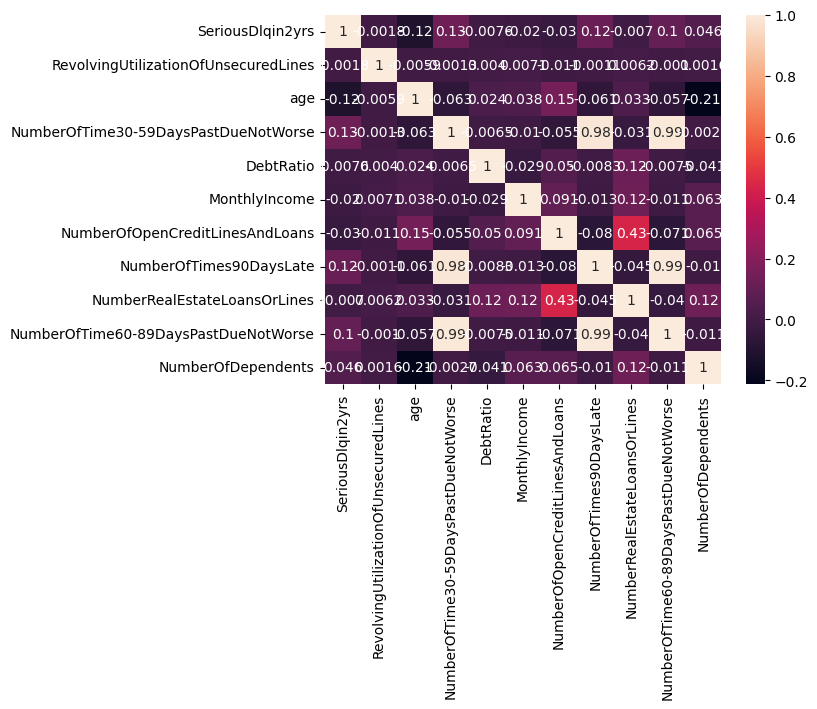

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.heatmap(data_train.corr(), annot=True)

### Trying picking specific rows ###
Let's try to pick specific rows, and see how they are correlated with target variable. Here, I picked these, who has 
\ DebtRatio biggen than average. As we can see, these people usually have more correlation between their features and target variable

(21834, 11)


<Axes: >

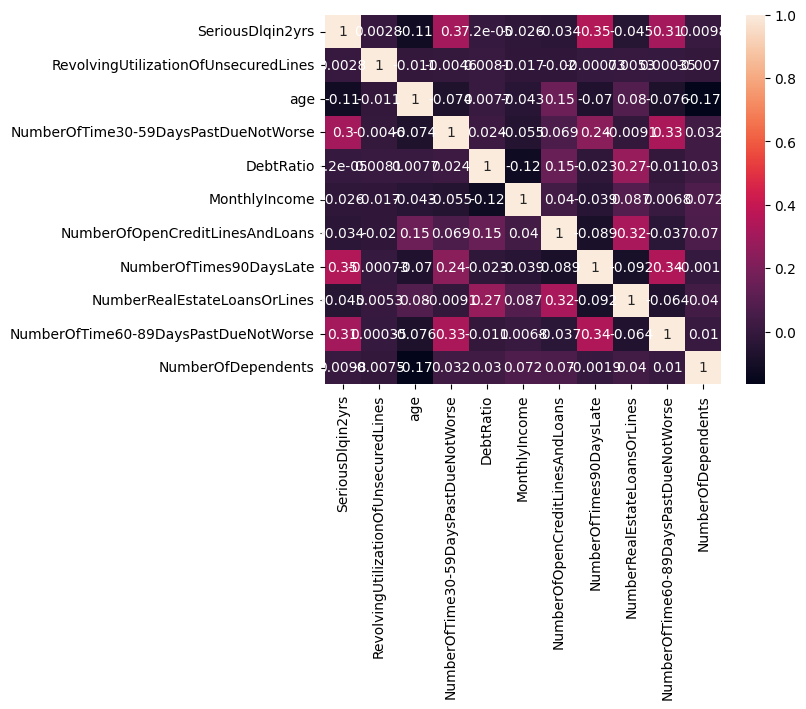

In [5]:

mean_debt_ratio = data_train.DebtRatio.mean()
debt_ratio_bigger_than_mean = data_train[data_train.DebtRatio > mean_debt_ratio]
print(debt_ratio_bigger_than_mean.shape)
sns.heatmap(annot=True, data = debt_ratio_bigger_than_mean.corr())

Let's try to investigate further. Here I will try to pick rows which has lower MonthlyIncome, and higher DebtRatio

count    76123.000000
mean      3821.216150
std       1676.616826
min          0.000000
25%       2600.000000
50%       3965.000000
75%       5141.000000
max       6670.000000
Name: MonthlyIncome, dtype: float64


/var/folders/yv/pfr0hn755gjbm9trsh5xk0ch0000gn/T/ipykernel_316/267016533.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_train_combined_mean_ratio = data_train_income_less_than_mean[data_train.DebtRatio > new_mean_debtratio]


<Axes: >

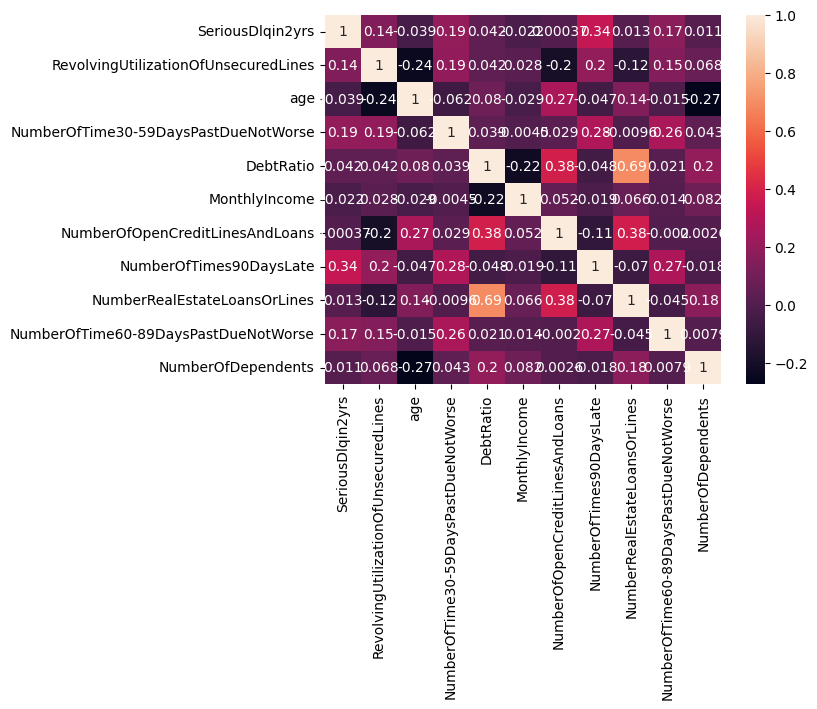

In [6]:
# Here I first look for the rows, for which we have less monthly income than mean income (in this case, by five times)
mean_income = data_train.MonthlyIncome.mean()
data_train_income_less_than_mean = data_train[data_train.MonthlyIncome < mean_income]
# Then, from these chosen rows I continue selecting, for this time these, who has DebtRatio bigger than mean in newly created group
new_mean_debtratio = data_train_income_less_than_mean.DebtRatio.mean()
data_train_combined_mean_ratio = data_train_income_less_than_mean[data_train.DebtRatio > new_mean_debtratio]
# And plot the data, trying to suspect any correlation elevation with the target variable
print(data_train_income_less_than_mean.MonthlyIncome.describe())
sns.heatmap(annot=True, data = data_train_combined_mean_ratio.corr(method='spearman'))

Let's now check the correlation with people in possibly fraud age 

count    19253.000000
mean         0.111723
std          0.315033
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64


<Axes: >

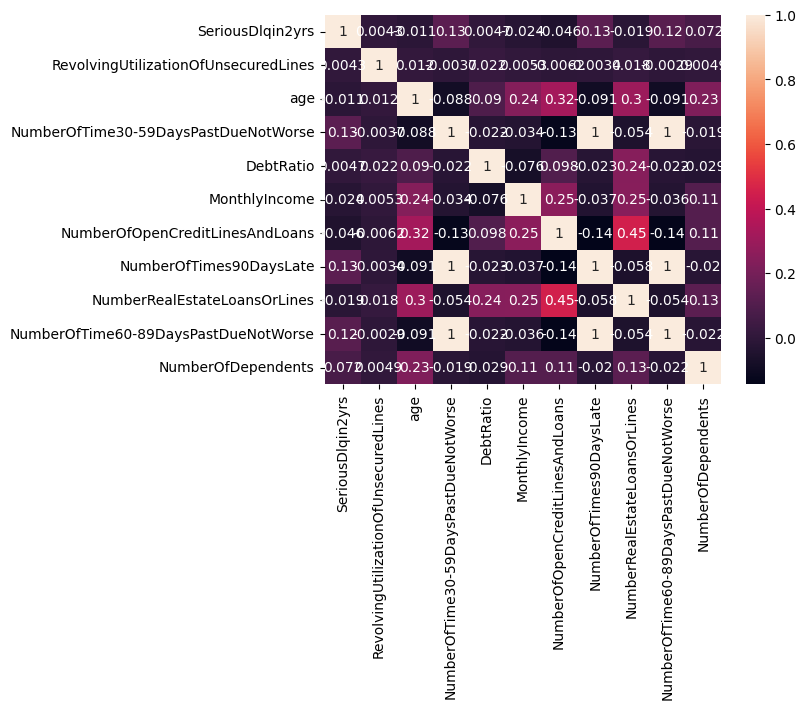

In [7]:
data_train_high_age = data_train[np.logical_or(data_train.age < 35, data_train.age > 100)]
print(data_train_high_age.SeriousDlqin2yrs.describe()) # people within age range above have twice more chances of being fault
sns.heatmap(annot=True, data =  data_train_high_age.corr())


And also do the same procedure for opened credit lines

<Axes: >

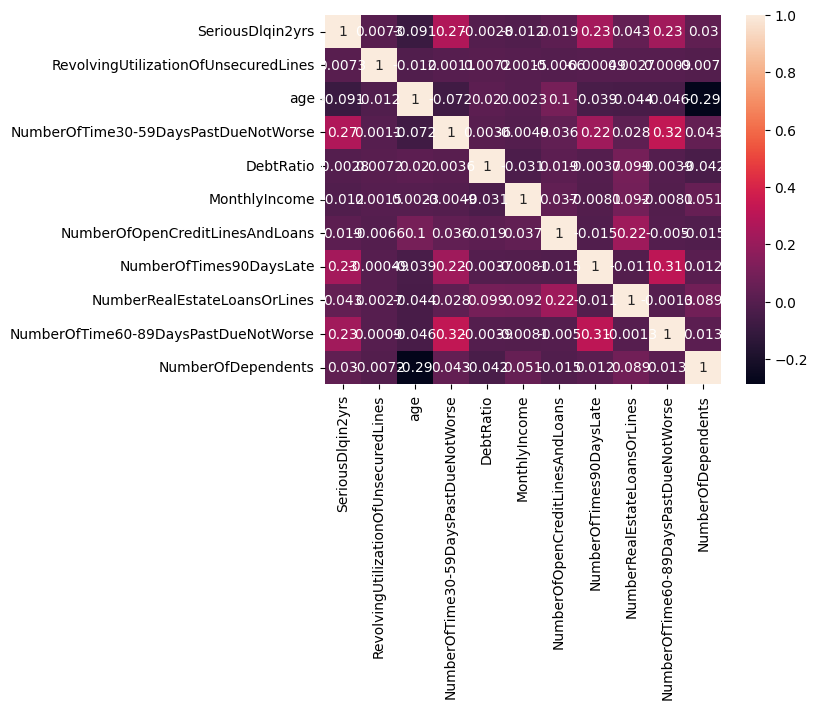

In [8]:
opened_median = data_train.NumberOfOpenCreditLinesAndLoans.median()
data_train_high_opened = data_train[data_train.NumberOfOpenCreditLinesAndLoans > opened_median]
sns.heatmap(annot=True, data = data_train_high_opened.corr())

### Exploring data with relplots and kdeplots ### 
Let's try to use relplot to see relation between features and target variable. Let's explore column 'RevolvingUtilization...'

(20.0, 100.0)

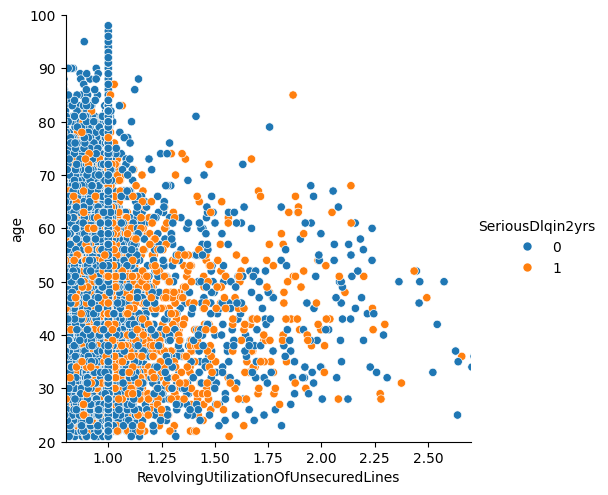

In [9]:
sns.relplot(data = data_train[data_train['RevolvingUtilizationOfUnsecuredLines'] > 0], x = 'RevolvingUtilizationOfUnsecuredLines', y = 'age', hue = 'SeriousDlqin2yrs')
plt.xlim(0.8, 2.7)
plt.ylim(20, 100)

# From that we can see, that there is some increase in fraud, for revolving being in range from 1.00 to 2.5; the percentage of fraud here is much higher than everywhere;
# We can make another binary category, which depict the beingness of revolving in that range, or, rather, any numerical feature.


<Axes: xlabel='age', ylabel='Density'>

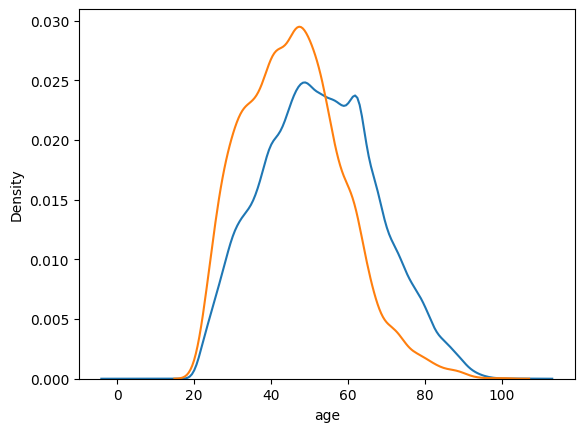

In [10]:
# let's visualize ages, at which fraud is more likely
# associate each fraud, with its age
sns.kdeplot(data=data_train[data_train['SeriousDlqin2yrs'] == 0], x = 'age') # we see, that given it this Fraud, the distribution of age is somewhat skewed right; we can  
sns.kdeplot(data=data_train[data_train['SeriousDlqin2yrs'] == 1], x = 'age') 


(0.0, 200.0)

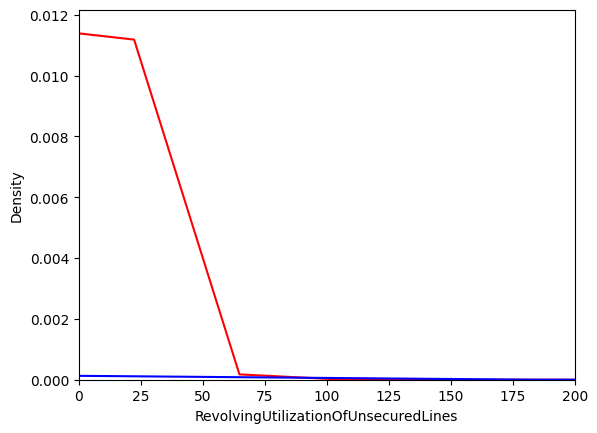

In [11]:
sns.kdeplot(data=data_train[data_train['SeriousDlqin2yrs'] == 1], x = 'RevolvingUtilizationOfUnsecuredLines', color='Red')
sns.kdeplot(data=data_train[data_train['SeriousDlqin2yrs'] == 0], x = 'RevolvingUtilizationOfUnsecuredLines', color='Blue')
plt.xlim(0, 200)

# Here, we can clearly see, that, first of all, the distribution is highly skewed, and second of all, people with fraud have revolving utilization much higher  than usual people
# On that, we firstly can multiply the feature by itself (squaring), and second of all, create a binary feature, depicting that we have Revolving Utilization for that person bigger than 1

(0.0, 100000.0)

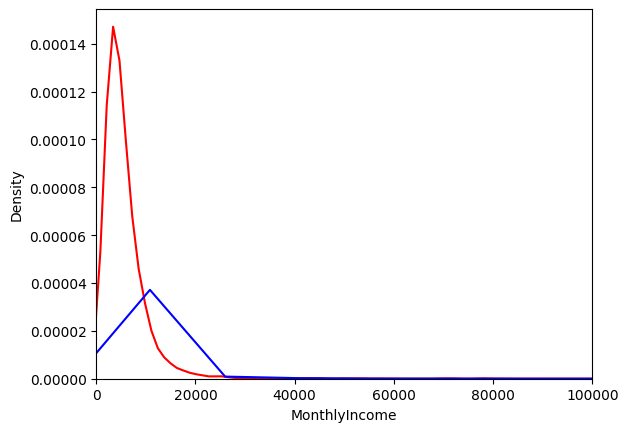

In [12]:
# Let's now address feature that is correlated negatively with the target variable, according to previous heat map plots

sns.kdeplot(data=data_train[data_train['SeriousDlqin2yrs'] == 1], x = 'MonthlyIncome', color='red')
sns.kdeplot(data=data_train[data_train['SeriousDlqin2yrs'] == 0], x = 'MonthlyIncome', color='blue')
plt.xlim(0, 100000)

# So, we can see several things: the distribution is again highly skewed, which we can address by taking logarithm transformation
# People with less income more likely to get fraud, so we can create a feature:  RevolvingUtilization ** 2 / MonthlyIncome 
# And also create a binary feature, whether person has monthly income less than 20000


From plots above we can make several conclusions:
- younger ages tend to have more probability of having fraud (younger than 40)
- people with income less than 20000 tend to have more probability of having fraud
- people with 'Revolving...' > 1 tend to have more probability of being fraud

In [13]:
# We will be creating new categorical featuers: 
# Moreover, there are features with Nan, so we have to handle it 
young_age = 40
poor_income = 20000
revolvingUtilization = 1

## Preprocessing the Data ## 
Let's preprocess the data. First of all, there will be two dataset: train and test dataset from kaggle. Therefore, we will fit imputers in the train dataset, making preprocess_df function \
useful for test dataset. Then we will have several changes within dataset:
- Create binary feature, which will depict, whether the individual in fraud range of RevolvingUtilization
- Check, whether the individual young, has poor income, or has more than one revolving
- Log transforming the features, to make them less skewed.
- Creating new feature: revolvingAndIncome, since revolving is positively correlated with target variable, and monthlyIncome negatively
- Squaring the important features
- Creating feature which will sum up all the days features (NumberOfTime...)

In [14]:
data_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [15]:
from sklearn.impute import SimpleImputer


data_train = pd.read_csv('dataset/GiveMeSomeCredit-training.csv')
data_train = data_train.drop(' ', axis = 1)

imputer_monthly = SimpleImputer(strategy='mean')
imputer_dependents = SimpleImputer(strategy='mean')

imputer_monthly.fit(pd.DataFrame(data_train['MonthlyIncome'], columns=['MonthlyIncome']))
imputer_dependents.fit(pd.DataFrame(data_train['NumberOfDependents'], columns=['NumberOfDependents']))


def preprocess_df(df,imputer_monthly, imputer_dependents, young_age, poor_income, revolvingUtilization):
    revolvingInFraudRange = list(np.logical_and(df['RevolvingUtilizationOfUnsecuredLines'] < 2.7,df['RevolvingUtilizationOfUnsecuredLines'] > 0.8 )) # NEW 
    isYoung = list(df['age'] < young_age)
    isPoorIncome = list(df['MonthlyIncome'] < poor_income)
    doesHaveRevolving = list(df['RevolvingUtilizationOfUnsecuredLines'] > revolvingUtilization)
    
    
    df['revolvingInFraudRange'] =  revolvingInFraudRange #NEW
    df['MonthlyIncome'] = imputer_monthly.transform(pd.DataFrame(df['MonthlyIncome'], columns=['MonthlyIncome']))
    df['NumberOfDependents'] = imputer_dependents.transform(pd.DataFrame(df['NumberOfDependents'], columns=['NumberOfDependents']))

    df['isYoung'] = isYoung
    df['isPoorIncome'] = isPoorIncome 
    df['doesHaveRevolving'] = doesHaveRevolving
    
    # let's simply square all features that is more correlated with fraud
    

    df['age'] = [np.log(age_indiv) if age_indiv != 0 else 0  for age_indiv in df['age']]
    df['MonthlyIncome'] = [np.log(income) if income != 0 else 0 for income in df['MonthlyIncome']]
    df['RevolvingUtilizationOfUnsecuredLines'] = [np.log(revolving) if revolving != 0 else 0 for revolving in df['RevolvingUtilizationOfUnsecuredLines']]
    df['revolvingAndIncome'] = [df['RevolvingUtilizationOfUnsecuredLines'][i] ** 2 / df['MonthlyIncome'][i] if df['MonthlyIncome'][i] != 0 else 0 for i in range(df['MonthlyIncome'].shape[0])]
    df['squaredNumber'] = df['NumberOfTime30-59DaysPastDueNotWorse'] ** 2
    df['squaredRevolving'] = df['RevolvingUtilizationOfUnsecuredLines'] ** 2
    df['squaredDependents'] = df['NumberOfDependents'] ** 2
    df['daysLate'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTime60-89DaysPastDueNotWorse'] + df['NumberOfTimes90DaysLate']
    df.isYoung = df.isYoung.astype('int')
    df.isPoorIncome = df.isPoorIncome.astype('int')
    df.doesHaveRevolving = df.doesHaveRevolving.astype('int')
    
    return df


data_train = preprocess_df(data_train,  imputer_monthly, imputer_dependents, young_age, poor_income, revolvingUtilization)

In [16]:
X = data_train.drop('SeriousDlqin2yrs', axis = 1)
y = data_train['SeriousDlqin2yrs']

In [57]:
# Let's split our dataset
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=41)

## Working with models ##
Here I will try three different powerful models: LogisticRegression, CatBoost, XGboost \
Since the dataset is imbalanced, I will also try different resampling techniques: undersampling and oversampling

### Logistic Regression ### 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

clf_logi = GridSearchCV(
    estimator=LogisticRegression(solver = 'newton-cholesky'), # Newton Cholesky, since other solver could not properly converge
    refit=True,
    scoring='roc_auc',
    param_grid= {
        'C': [1, 2, 5, 10, 100, 200, 1000],
        'class_weight': ['balanced'],
        'penalty': ['l2']
    },
    cv=5
)


clf_logi.fit(X_train, y_train)
print(f'Best score: {clf_logi.best_score_}')
print(f'Best params: {clf_logi.best_params_}')




Best score: 0.8480560587073089
Best params: {'C': 1000, 'class_weight': 'balanced', 'penalty': 'l2'}


              precision    recall  f1-score   support

           0       0.97      0.94      0.95     41992
           1       0.38      0.54      0.44      3008

    accuracy                           0.91     45000
   macro avg       0.67      0.74      0.70     45000
weighted avg       0.93      0.91      0.92     45000



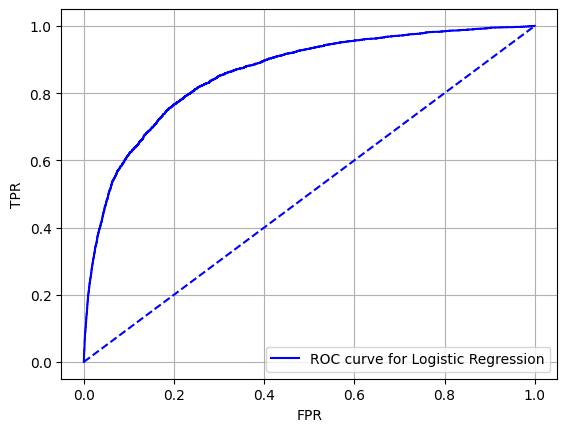

In [59]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

predictions_proba = clf_logi.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, predictions_proba)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore )

optimal_threshold = thresholds[ix]

if optimal_threshold > 0.99 or optimal_threshold < 0.01:
    optimal_threshold = 0.5

predictions = [1 if proba > optimal_threshold else 0 for proba in predictions_proba ]

print(classification_report(y_test, predictions, zero_division=0))
tpr, fpr, _ = roc_curve(y_test, clf_logi.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr, color = 'blue', label='ROC curve for Logistic Regression')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), color = 'blue', linestyle='dashed')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()

Over Sampling

In [60]:
# trying oversampling
from imblearn.over_sampling import ADASYN

X_train_resampled, y_train_resampled = ADASYN().fit_resample(X_train, y_train)


Best score: 0.8320518252237636
Best params: {'C': 1, 'class_weight': None, 'penalty': 'l2'}


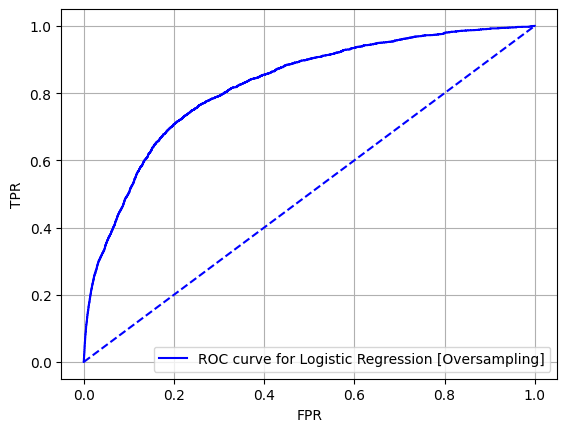

In [61]:

clf_logi_resampling = GridSearchCV(
    estimator=LogisticRegression(solver='newton-cholesky'),
    refit=True,
    scoring='roc_auc',
    param_grid= {
        'C': [1, 5, 10, 100],
        'class_weight': [None, 'balanced'],
        'penalty': ['l2']
    },
    cv=5
)


clf_logi_resampling.fit(X_train_resampled, y_train_resampled)
print(f'Best score: {clf_logi_resampling.best_score_}')
print(f'Best params: {clf_logi_resampling.best_params_}')


tpr, fpr, _ = roc_curve(y_test, clf_logi_resampling.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr, color = 'blue', label='ROC curve for Logistic Regression [Oversampling]')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), color = 'blue', linestyle='dashed')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()

# As we can see, oversampling did not properly improve our model.

Under sampling

In [62]:
# trying under sample 
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

X_train_resampled, y_train_resampled = RandomUnderSampler(sampling_strategy=0.675, random_state=42).fit_resample(X_train, y_train)

In [63]:
y_train_resampled.describe()

count    17415.000000
mean         0.402986
std          0.490512
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64

Best score: 0.8470287294098704
Best params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}


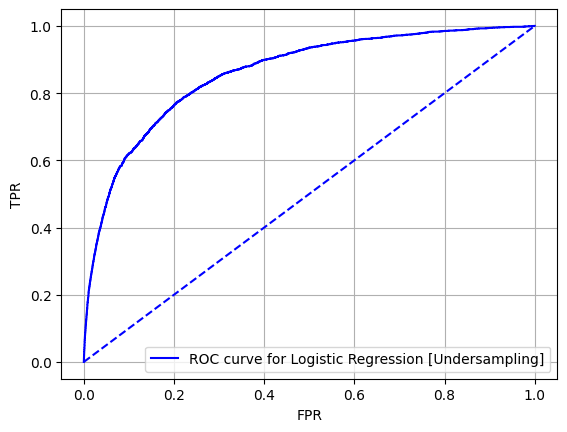

In [64]:

clf_logi_resampling = GridSearchCV(
    estimator=LogisticRegression(solver='newton-cholesky'),
    refit=True,
    scoring='roc_auc',
    param_grid= {
        'C': [1, 5, 10, 100],
        'class_weight': [None, 'balanced'],
        'penalty': ['l2']
    },
    cv=5
)


clf_logi_resampling.fit(X_train_resampled, y_train_resampled)
print(f'Best score: {clf_logi_resampling.best_score_}')
print(f'Best params: {clf_logi_resampling.best_params_}')


tpr, fpr, _ = roc_curve(y_test, clf_logi_resampling.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr, color = 'blue', label='ROC curve for Logistic Regression [Undersampling]')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), color = 'blue', linestyle='dashed')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()

# Still, under sampling did not properly improve our model

In [65]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

predictions_proba = clf_logi_resampling.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, predictions_proba)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)

optimal_threshold = thresholds[ix]

predictions_proba_X = clf_logi_resampling.predict_proba(X)[:, 1]
predictions = [1 if proba > optimal_threshold else 0 for proba in predictions_proba_X]

print(classification_report(y, predictions))

# well, the classification report looks a little bit better.

              precision    recall  f1-score   support

           0       0.96      0.94      0.95    139974
           1       0.37      0.50      0.43     10026

    accuracy                           0.91    150000
   macro avg       0.67      0.72      0.69    150000
weighted avg       0.92      0.91      0.92    150000



Conclusion: resampling techniques did not help us in improving the model, and default LogisticRegression with original dataset is preferable

### XGBoost ### 

In [66]:
from xgboost import XGBClassifier

param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
clf_xgb = GridSearchCV(XGBClassifier(), param_grid, scoring='roc_auc', cv=5)
clf_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

0.8746470167316571


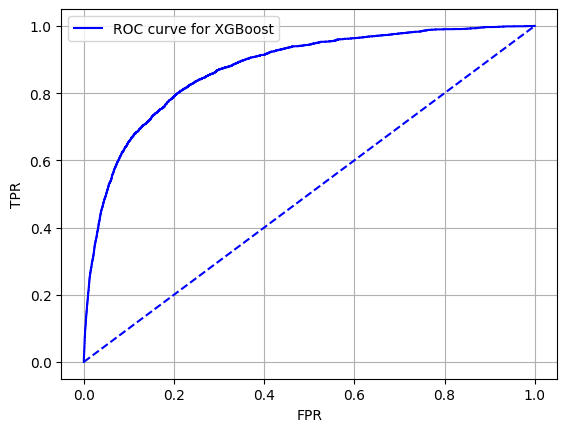

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     41992
           1       0.41      0.53      0.46      3008

    accuracy                           0.92     45000
   macro avg       0.69      0.74      0.71     45000
weighted avg       0.93      0.92      0.92     45000



In [67]:
print(roc_auc_score(y_test, clf_xgb.predict_proba(X_test)[:, 1]))

tpr, fpr, _ = roc_curve(y_test, clf_xgb.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr, color = 'blue', label='ROC curve for XGBoost')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), color = 'blue', linestyle='dashed')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()



precision, recall, thresholds = precision_recall_curve(y_test, clf_xgb.predict_proba(X_test)[:, 1])

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)

optimal_threshold = thresholds[ix]

predictions = [1 if proba > optimal_threshold else 0 for proba in clf_xgb.predict_proba(X_test)[:, 1]]

print(classification_report(y_test, predictions))

# Well, XGBoost yield very promising results.

Conclusion: while there is no code for re-sampling techniques, it actually did not improve for XGBoost either. Using XGBoost, we obtaining higher AUC score than Logistic Regression

### CatBoost ### 

In [68]:
from catboost import CatBoostClassifier
clf_cat = CatBoostClassifier(max_depth = 5, objective = 'Logloss', eval_metric =  'AUC', random_state=42)
clf_cat.fit(X_train, y_train)


Learning rate set to 0.075159
0:	total: 7.8ms	remaining: 7.79s
1:	total: 13.8ms	remaining: 6.9s
2:	total: 19.6ms	remaining: 6.51s
3:	total: 25.7ms	remaining: 6.4s
4:	total: 31.2ms	remaining: 6.21s
5:	total: 36.8ms	remaining: 6.1s
6:	total: 42.3ms	remaining: 6s
7:	total: 48ms	remaining: 5.96s
8:	total: 54.2ms	remaining: 5.96s
9:	total: 59.5ms	remaining: 5.89s
10:	total: 64.3ms	remaining: 5.78s
11:	total: 69.9ms	remaining: 5.75s
12:	total: 75.7ms	remaining: 5.74s
13:	total: 80.6ms	remaining: 5.67s
14:	total: 86.8ms	remaining: 5.7s
15:	total: 91.8ms	remaining: 5.64s
16:	total: 97.3ms	remaining: 5.63s
17:	total: 103ms	remaining: 5.62s
18:	total: 108ms	remaining: 5.59s
19:	total: 114ms	remaining: 5.56s
20:	total: 118ms	remaining: 5.52s
21:	total: 124ms	remaining: 5.51s
22:	total: 129ms	remaining: 5.5s
23:	total: 135ms	remaining: 5.49s
24:	total: 141ms	remaining: 5.48s
25:	total: 146ms	remaining: 5.47s
26:	total: 151ms	remaining: 5.45s
27:	total: 157ms	remaining: 5.46s
28:	total: 163ms	remai

0.8739741943310885


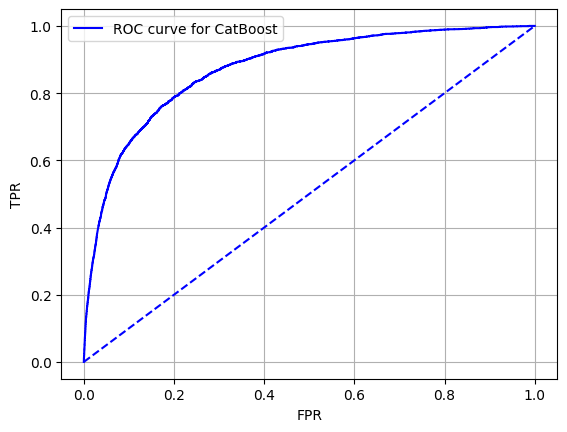

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     41992
           1       0.40      0.54      0.46      3008

    accuracy                           0.92     45000
   macro avg       0.68      0.74      0.71     45000
weighted avg       0.93      0.92      0.92     45000



In [69]:
print(roc_auc_score(y_test, clf_cat.predict_proba(X_test)[:, 1]))

tpr, fpr, _ = roc_curve(y_test, clf_cat.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr, color = 'blue', label='ROC curve for CatBoost')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), color = 'blue', linestyle='dashed')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()



precision, recall, thresholds = precision_recall_curve(y_test, clf_cat.predict_proba(X_test)[:, 1])

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)

optimal_threshold = thresholds[ix]

predictions = [1 if proba > optimal_threshold else 0 for proba in clf_cat.predict_proba(X_test)[:, 1]]

print(classification_report(y_test, predictions))


Here, we can see, that using catboost we actually obtained the highest score among all models.
Let's now check the case for resampling methods

Learning rate set to 0.098319
0:	total: 10.4ms	remaining: 10.4s
1:	total: 20.2ms	remaining: 10.1s
2:	total: 29ms	remaining: 9.63s
3:	total: 38ms	remaining: 9.46s
4:	total: 46.7ms	remaining: 9.3s
5:	total: 56.1ms	remaining: 9.3s
6:	total: 66.4ms	remaining: 9.42s
7:	total: 75.8ms	remaining: 9.4s
8:	total: 83.9ms	remaining: 9.23s
9:	total: 92.8ms	remaining: 9.19s
10:	total: 101ms	remaining: 9.12s
11:	total: 111ms	remaining: 9.14s
12:	total: 120ms	remaining: 9.11s
13:	total: 129ms	remaining: 9.07s
14:	total: 138ms	remaining: 9.06s
15:	total: 146ms	remaining: 8.99s
16:	total: 153ms	remaining: 8.86s
17:	total: 162ms	remaining: 8.81s
18:	total: 169ms	remaining: 8.75s
19:	total: 177ms	remaining: 8.68s
20:	total: 185ms	remaining: 8.63s
21:	total: 193ms	remaining: 8.59s
22:	total: 202ms	remaining: 8.58s
23:	total: 209ms	remaining: 8.52s
24:	total: 218ms	remaining: 8.51s
25:	total: 226ms	remaining: 8.47s
26:	total: 235ms	remaining: 8.46s
27:	total: 243ms	remaining: 8.45s
28:	total: 252ms	remainin

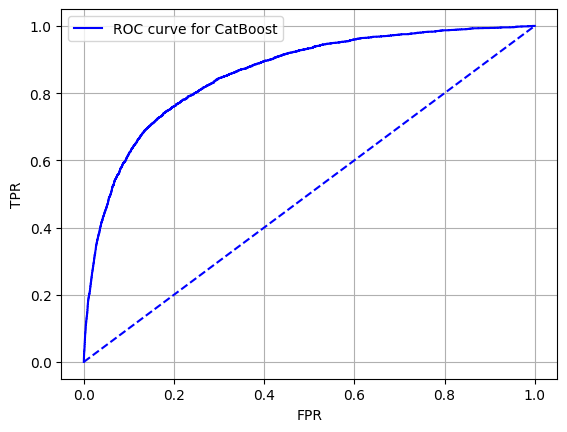

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     41992
           1       0.37      0.52      0.43      3008

    accuracy                           0.91     45000
   macro avg       0.67      0.73      0.69     45000
weighted avg       0.92      0.91      0.92     45000



In [70]:
# under sampling techniques for catboost
X_train_resampled, y_train_resampled = ADASYN().fit_resample(X_train, y_train)

clf_cat = CatBoostClassifier(max_depth = 4, objective = 'Logloss', eval_metric =  'AUC', random_state=42)
clf_cat.fit(X_train_resampled, y_train_resampled)


print(roc_auc_score(y_test, clf_cat.predict_proba(X_test)[:, 1]))

tpr, fpr, _ = roc_curve(y_test, clf_cat.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr, color = 'blue', label='ROC curve for CatBoost')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), color = 'blue', linestyle='dashed')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()



precision, recall, thresholds = precision_recall_curve(y_test, clf_cat.predict_proba(X_test)[:, 1])

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)

optimal_threshold = thresholds[ix]

predictions = [1 if proba > optimal_threshold else 0 for proba in clf_cat.predict_proba(X_test)[:, 1]]

print(classification_report(y_test, predictions))


The over sampling did not yield any improvements for our model

Learning rate set to 0.034578
0:	total: 3.53ms	remaining: 3.53s
1:	total: 6.55ms	remaining: 3.27s
2:	total: 9.35ms	remaining: 3.11s
3:	total: 11.9ms	remaining: 2.97s
4:	total: 14.3ms	remaining: 2.84s
5:	total: 16.8ms	remaining: 2.79s
6:	total: 18.8ms	remaining: 2.67s
7:	total: 20.7ms	remaining: 2.57s
8:	total: 22.6ms	remaining: 2.49s
9:	total: 24.7ms	remaining: 2.44s
10:	total: 26.8ms	remaining: 2.41s
11:	total: 29.3ms	remaining: 2.41s
12:	total: 31.8ms	remaining: 2.42s
13:	total: 34.2ms	remaining: 2.41s
14:	total: 36.5ms	remaining: 2.4s
15:	total: 38.5ms	remaining: 2.37s
16:	total: 41.1ms	remaining: 2.37s
17:	total: 43.8ms	remaining: 2.39s
18:	total: 45.9ms	remaining: 2.37s
19:	total: 48ms	remaining: 2.35s
20:	total: 50.2ms	remaining: 2.34s
21:	total: 52.5ms	remaining: 2.33s
22:	total: 54.5ms	remaining: 2.31s
23:	total: 56.7ms	remaining: 2.31s
24:	total: 59ms	remaining: 2.3s
25:	total: 61.2ms	remaining: 2.29s
26:	total: 63.5ms	remaining: 2.29s
27:	total: 65.3ms	remaining: 2.27s
28:	to

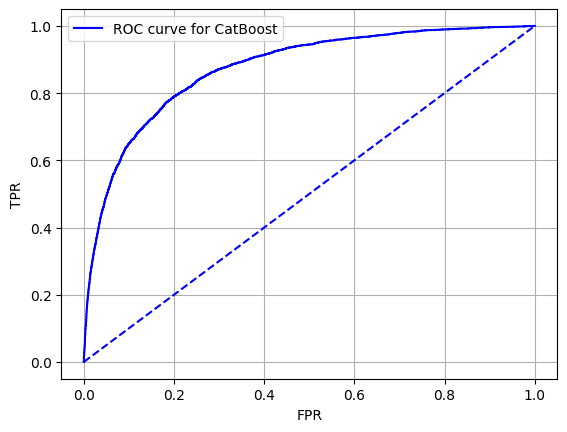

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     41992
           1       0.00      0.00      0.00      3008

    accuracy                           0.93     45000
   macro avg       0.47      0.50      0.48     45000
weighted avg       0.87      0.93      0.90     45000



/var/folders/yv/pfr0hn755gjbm9trsh5xk0ch0000gn/T/ipykernel_316/3029197127.py:21: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metric

In [71]:
# under sampling techniques for catboost
X_train_resampled, y_train_resampled = RandomUnderSampler(sampling_strategy=0.7, random_state=42).fit_resample(X_train, y_train) #0.675, 0.7
clf_cat = CatBoostClassifier(max_depth = 4, n_estimators=1000, objective = 'Logloss', eval_metric =  'AUC', random_state=42)
clf_cat.fit(X_train_resampled, y_train_resampled)

print(roc_auc_score(y_test, clf_cat.predict_proba(X_test)[:, 1]))

tpr, fpr, _ = roc_curve(y_test, clf_cat.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr, color = 'blue', label='ROC curve for CatBoost')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), color = 'blue', linestyle='dashed')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()



precision, recall, thresholds = precision_recall_curve(y_test, clf_cat.predict_proba(X_test)[:, 1])

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)

optimal_threshold = thresholds[ix]

predictions = [1 if proba > optimal_threshold else 0 for proba in clf_cat.predict_proba(X_test)[:, 1]]

print(classification_report(y_test, predictions))


/var/folders/yv/pfr0hn755gjbm9trsh5xk0ch0000gn/T/ipykernel_316/2539264071.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


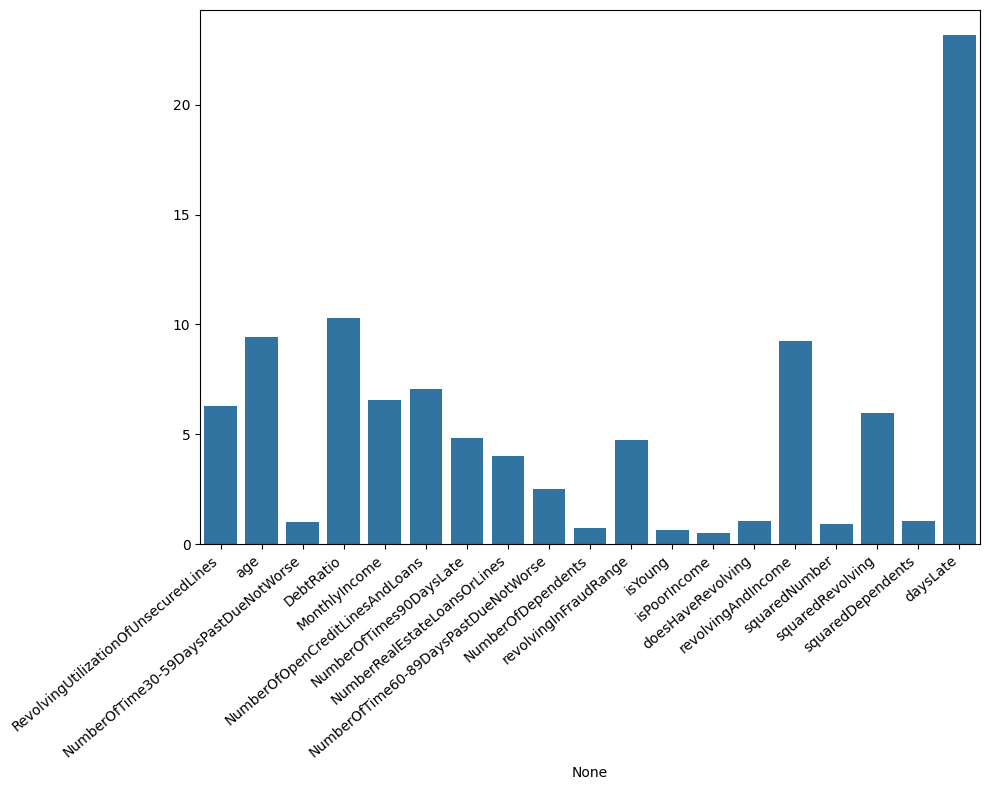

In [72]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x = X_train.columns, y = clf_cat.feature_importances_)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()

**Conclusion**: Both CatBoost and XGBoost yield very good results; But do we have any statistical difference between XGBoost and CatBoost?

## A/B Testing (XGBoost and CatBoost) ## 

Exploring the models for the credit scoring task, I concluded that there are two best models: CatBoost and XGBoost
Therefore, to determine, which of my two models is the best I will perform an A/B testing. 
The procedure is the following:
1. Splitting my dataset into training and test parts (the ratio = 0.3)
2. Training both models on the same training dataset
3. Performing predictions on testing dataset 
4. Evaluating the predictions of models: I will go through the predictions, and mark that prediction as 1, if it is correct, 0 otherwise. The mean of that list will represent the accuracy of the model.
5. Set the probability of type I error (significance level) to be 0.05 
6. Compare two samples using paired t-test (Since we do not know variances of the population, paired because samples on which we will test are not independent, we will test the same validation set instances on both model), obtain the p-value
7. Check whether there is statistical difference between accuracy of our models.

In [74]:
from scipy.stats import ttest_rel


alpha = 0.05

X_ab_train, X_ab_test, y_ab_train, y_ab_test = train_test_split(X, y, test_size=0.3, random_state=41)

clf_ab_cat = CatBoostClassifier(max_depth = 5, n_estimators=1000, objective = 'Logloss',  random_state = 42, verbose=False)
clf_ab_xgb = XGBClassifier(max_depth = 5, n_estimators=1000, objective = 'binary:logistic', random_state = 42)

clf_ab_cat.fit(X_ab_train, y_ab_train)
clf_ab_xgb.fit(X_ab_train, y_ab_train)

predictions_ab_cat = clf_ab_cat.predict(X_ab_test)
predictions_ab_xgb = clf_ab_xgb.predict(X_ab_test)

score_ab_cat = [1 if prediction == y_ab_test.to_numpy()[idx] else 0 for idx, prediction in enumerate(predictions_ab_cat)]
score_ab_xgb = [1 if prediction == y_ab_test.to_numpy()[idx] else 0 for idx, prediction in enumerate(predictions_ab_xgb)]

statistic, pvalue = ttest_rel(score_ab_cat, score_ab_xgb)
print(f'The T-statistic of two models: {statistic:.2f}, p-value: {pvalue:.3f}')

if pvalue < alpha:
    print('There is significant difference between two models')
else:
    print('There are no significant difference between the two models')
print(f'The accuracy of CatBoost: {np.mean(score_ab_cat):.2f}')
print(f'The accuracy of XGBoost: {np.mean(score_ab_xgb):.2f}')

The T-statistic of two models: 6.60, p-value: 0.000
There is significant difference between two models
The accuracy of CatBoost: 0.94
The accuracy of XGBoost: 0.93


## Final Model ##

The results of A/B test, performed above:
```markdown
The T-statistic of two models: 6.60, p-value: 0.000
There is significant difference between two models
The accuracy of CatBoost: 0.94
The accuracy of XGBoost: 0.93
```

Therefore, CatBoost performs better, and I will choose it as the final model

Learning rate set to 0.075159
0:	total: 8.79ms	remaining: 8.78s
1:	total: 16.2ms	remaining: 8.09s
2:	total: 23.1ms	remaining: 7.66s
3:	total: 29.9ms	remaining: 7.44s
4:	total: 38.2ms	remaining: 7.6s
5:	total: 44.5ms	remaining: 7.37s
6:	total: 50.1ms	remaining: 7.1s
7:	total: 58.4ms	remaining: 7.24s
8:	total: 63.8ms	remaining: 7.02s
9:	total: 69.4ms	remaining: 6.87s
10:	total: 74.9ms	remaining: 6.73s
11:	total: 80ms	remaining: 6.59s
12:	total: 85.2ms	remaining: 6.46s
13:	total: 90.2ms	remaining: 6.35s
14:	total: 95.5ms	remaining: 6.27s
15:	total: 101ms	remaining: 6.19s
16:	total: 106ms	remaining: 6.14s
17:	total: 112ms	remaining: 6.1s
18:	total: 117ms	remaining: 6.04s
19:	total: 122ms	remaining: 5.98s
20:	total: 127ms	remaining: 5.9s
21:	total: 132ms	remaining: 5.87s
22:	total: 137ms	remaining: 5.82s
23:	total: 142ms	remaining: 5.78s
24:	total: 148ms	remaining: 5.78s
25:	total: 153ms	remaining: 5.75s
26:	total: 159ms	remaining: 5.71s
27:	total: 164ms	remaining: 5.7s
28:	total: 169ms	rem

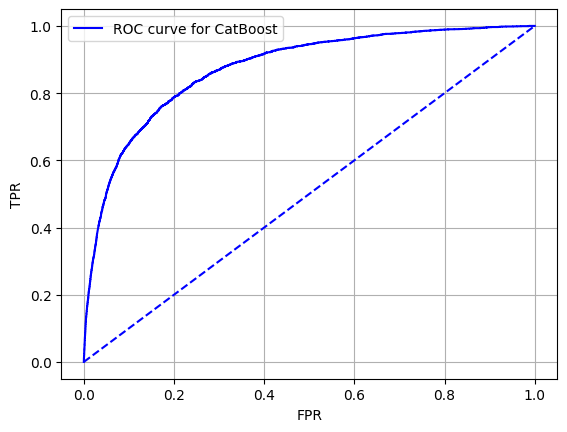

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     41992
           1       0.40      0.54      0.46      3008

    accuracy                           0.92     45000
   macro avg       0.68      0.74      0.71     45000
weighted avg       0.93      0.92      0.92     45000

Learning rate set to 0.079569
0:	total: 7.84ms	remaining: 7.83s
1:	total: 14.6ms	remaining: 7.27s
2:	total: 22.3ms	remaining: 7.4s
3:	total: 29.3ms	remaining: 7.3s
4:	total: 36.6ms	remaining: 7.29s
5:	total: 43.5ms	remaining: 7.21s
6:	total: 50.6ms	remaining: 7.18s
7:	total: 57.8ms	remaining: 7.17s
8:	total: 64.9ms	remaining: 7.15s
9:	total: 71.4ms	remaining: 7.07s
10:	total: 78.2ms	remaining: 7.03s
11:	total: 84.7ms	remaining: 6.97s
12:	total: 91.6ms	remaining: 6.95s
13:	total: 98.7ms	remaining: 6.95s
14:	total: 106ms	remaining: 6.95s
15:	total: 112ms	remaining: 6.91s
16:	total: 119ms	remaining: 6.87s
17:	total: 126ms	remaining: 6.88s
18:	total: 133ms	remaining: 6

In [75]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

clf_cat = CatBoostClassifier(max_depth = 5, objective = 'Logloss', eval_metric =  'AUC', random_state=42)
clf_cat.fit(X_train, y_train)

print(roc_auc_score(y_test, clf_cat.predict_proba(X_test)[:, 1]))

tpr, fpr, _ = roc_curve(y_test, clf_cat.predict_proba(X_test)[:, 1])
plt.plot(tpr, fpr, color = 'blue', label='ROC curve for CatBoost')
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), color = 'blue', linestyle='dashed')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()



precision, recall, thresholds = precision_recall_curve(y_test, clf_cat.predict_proba(X_test)[:, 1])

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)

optimal_threshold = thresholds[ix]

predictions = [1 if proba > optimal_threshold else 0 for proba in clf_cat.predict_proba(X_test)[:, 1]]

clf_cat.set_probability_threshold(optimal_threshold)
print(classification_report(y_test, predictions))

scores = cross_val_score(clf_cat, X, y, cv=5, scoring='roc_auc')
print(f'The average score after cross validation for the final model is: {np.sum(scores)/len(scores)}')

clf_cat.save_model('website/catboostmodel.cbm', format='cbm')